In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.text import *

In [3]:
DATA_PATH = Path('../data/')
LABEL_PATH = Path('../labels/')

In [4]:
bs = 48

In [5]:
data_lm = TextDataBunch.from_csv(DATA_PATH, 'consolidated_intents.csv', text_cols='text', label_cols='label')

/home/ubuntu/anaconda3/envs/pytorch_p36/lib/python3.6/site-packages/fastai/data_block.py:475: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the folowing unknown labels, the corresponding items have been discarded.
request-locksmith
  if getattr(ds, 'warn', False): warn(ds.warn)


In [6]:
data_lm = TextLMDataBunch.load(DATA_PATH, 'tmp_lm', bs=bs)

In [7]:
# data = TextDataBunch.load(DATA_PATH, 'tmp')

In [8]:
# data = TextClasDataBunch.load(DATA_PATH)
# data.show_batch()

## Language Model Finetuning

In [9]:
bs = 48

In [10]:
learn = language_model_learner(data_lm, pretrained_model=URLs.WT103_1, drop_mult=0.3)

In [11]:
learn1 = language_model_learner(data_lm, pretrained_model=URLs.WT103_1, drop_mult=0.3)

In [12]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


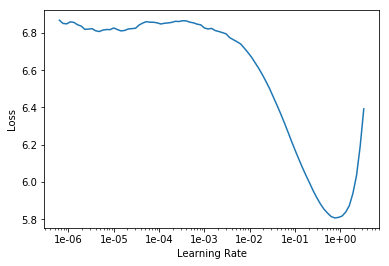

In [13]:
learn.recorder.plot()

In [14]:
learn.fit_one_cycle(1, 1e-1, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,4.046795,3.489845,0.307003


In [15]:
learn.save('fit_head')
learn.load('fit_head')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList
y: LMLabel (16219 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: ../data
x: LMTextList (16219 items)
[Text xxbos i 'm paying the bill, Text xxbos to change my homecare plan, Text xxbos to phone up to see when the engineers coming out, Text xxbos i am unable to send in meter reading any longer this is due to british gas changing the meter to xxunk xxmaj no just a xxunk meter, Text xxbos i have a query regarding my gas bill]...
Path: ../data;

Valid: LabelList
y: LMLabel (4056 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: ../data
x: LMTextList (4056 items)
[Text xxbos " xxmaj evening , i would like to book a service for my boiler next week yes ", Text xxbos gas fire please to remove, Text xxbos " xxmaj hi , i am having a new boiler fitted on xxmaj july 9th . xxmaj when i xxunk my quote i was told my homecare package would be reduced or even free for the next two years . xx

In [16]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


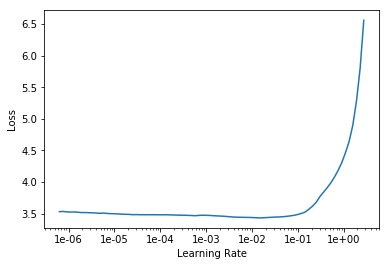

In [17]:
learn.lr_find()
learn.recorder.plot()

In [18]:
learn.fit_one_cycle(10, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,3.433980,3.408516,0.316737
2,3.329385,3.298968,0.328151
3,3.209279,3.218952,0.336292
4,3.079966,3.179236,0.342542
5,2.941640,3.159515,0.346691
6,2.808919,3.162775,0.347461
7,2.696214,3.177040,0.346919
8,2.596149,3.195033,0.347321
9,2.541754,3.206348,0.346919
10,2.505093,3.207880,0.346481


In [19]:
learn.save('fine_tuned')

In [20]:
learn.load('fine_tuned')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList
y: LMLabel (16219 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: ../data
x: LMTextList (16219 items)
[Text xxbos i 'm paying the bill, Text xxbos to change my homecare plan, Text xxbos to phone up to see when the engineers coming out, Text xxbos i am unable to send in meter reading any longer this is due to british gas changing the meter to xxunk xxmaj no just a xxunk meter, Text xxbos i have a query regarding my gas bill]...
Path: ../data;

Valid: LabelList
y: LMLabel (4056 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: ../data
x: LMTextList (4056 items)
[Text xxbos " xxmaj evening , i would like to book a service for my boiler next week yes ", Text xxbos gas fire please to remove, Text xxbos " xxmaj hi , i am having a new boiler fitted on xxmaj july 9th . xxmaj when i xxunk my quote i was told my homecare package would be reduced or even free for the next two years . xx

In [50]:
TEXT = "please help me with"
N_WORDS = 40
N_SENTENCES = 5

In [51]:
print("\n".join(learn1.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

please help me with the xxmaj walk of the xxmaj big xxmaj request ( xxmaj london ) . xxmaj by the time the xxmaj september 11 , xxmaj september 11 , , and xxmaj december 11 , xxmaj september 11 , xxmaj january 11
please help me with the name of the xxmaj new xxmaj york xxmaj times xxmaj best xxmaj selling xxmaj new xxmaj and xxmaj style xxmaj list . xxmaj the xxmaj new xxmaj york xxmaj times wrote " ... the xxmaj english press is able
please help me with xxmaj george xxmaj october . xxmaj as a part of the xxmaj national xxmaj old xxmaj xxmaj new xxmaj year xxmaj law xxmaj review xxmaj bill was signed by xxmaj robert xxmaj green and xxmaj thomas xxmaj man xxmaj power
please help me with this . xxmaj he came to xxmaj london in xxmaj june as the first person to visit xxmaj london from the uk , for which he was about to be given a new , self - aware , and less
please help me with the new xxmaj south xxmaj park . xxmaj it was the last time the xxmaj national xxmaj park xxmaj service of xxma

In [52]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

please help me with my password xxmaj my account number is : my account number is xxup xxx xxup xxx xxup xxx xxup xxx . xxmaj the space came up to check up on my account today xxbos i want to speak to the
please help me with the electricity . xxmaj my name is xxmaj colin xxmaj taylor xxbos my heating is not working xxbos i 've moved moving into a property that is supplied by you xxbos to see if you can tell me if you
please help me with the price owing as the lady i d like to pay and to do with the new agreement please xxbos i 'm writing with a someone on the phone for help in getting a call for a meter reading .
please help me with the number of twenty four hour before them can be able to send me a copy of the 14th . xxmaj also i have a smart meter installed and an old smart meter is nt working and my card is
please help me with my bank account number . xxmaj also my account number is : xxup xxx i m just a customer of yours i keep getting £ 50 in debit for this account . xxmaj thanks 

In [25]:
learn.save_encoder('fine_tuned_enc')

## Classifier

In [26]:
data_clas = TextList.from_csv(DATA_PATH, 'consolidated_intents.csv', cols='text', vocab=data_lm.vocab)


In [27]:
data_clas = TextClasDataBunch.from_csv(DATA_PATH, 'consolidated_intents.csv', 
                                       text_cols='text', label_cols='label', vocab=data_lm.vocab)
data_clas.save('tmp_clas')

In [28]:
data_clas = TextClasDataBunch.load(DATA_PATH, 'tmp_clas', bs=bs)

In [29]:
learner = text_classifier_learner(data_clas, drop_mult=0.5)
learner.load_encoder('fine_tuned_enc')
learner.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


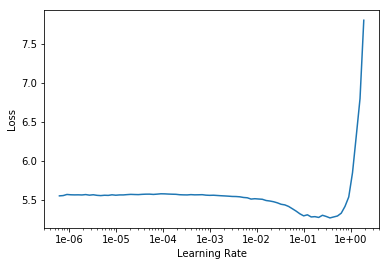

In [30]:
learner.lr_find()
learner.recorder.plot()

In [31]:
learner.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,3.316095,2.397772,0.432692


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


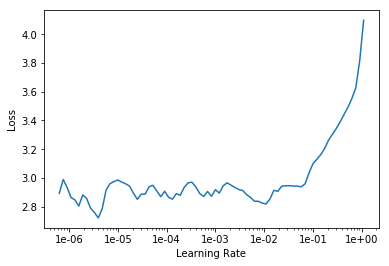

In [32]:
learner.freeze_to(-2)
learner.lr_find()
learner.recorder.plot()

In [33]:
learner.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,2.385956,1.784345,0.580868


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


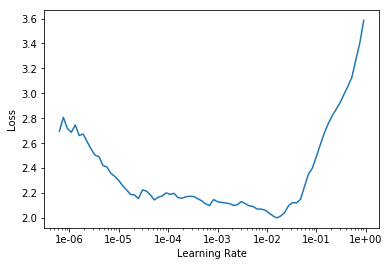

In [34]:
learner.freeze_to(-3)
learner.lr_find()
learner.recorder.plot()

In [35]:
learner.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,2.290246,1.642435,0.612426


In [36]:
learner.unfreeze()
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


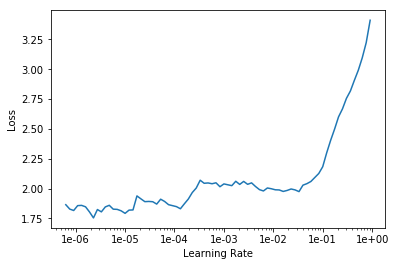

In [37]:
learner.recorder.plot()

In [54]:
learner.fit_one_cycle(10, slice(1e-2/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.595200,1.167829,0.748028
2,0.575241,1.171789,0.745069
3,0.731517,1.218244,0.744823
4,0.566015,1.217552,0.742850
5,0.534380,1.254984,0.745069
6,0.522757,1.261453,0.744823
7,0.426947,1.252529,0.749260
8,0.392401,1.279794,0.750000
9,0.340630,1.235056,0.752465
10,0.329878,1.270416,0.746548


learner.save('intent_classifier')
learner.load('intent_classifier')

In [40]:
learner.predict("can you please ")

(Category request-advisor,
 tensor(206),
 tensor([4.6160e-04, 6.8867e-07, 5.0408e-04, 1.3583e-06, 1.5851e-04, 2.4176e-06,
         1.2895e-06, 3.2654e-06, 2.1988e-05, 3.2376e-05, 1.0076e-06, 1.9309e-04,
         3.5494e-06, 2.3231e-04, 2.5032e-06, 4.8726e-06, 4.2424e-05, 2.8112e-04,
         7.6521e-07, 1.4093e-06, 2.4873e-05, 3.0309e-06, 9.6676e-07, 1.4049e-06,
         2.4380e-02, 1.1255e-02, 1.2684e-07, 3.6828e-04, 1.8117e-05, 2.2084e-05,
         2.1077e-07, 1.2795e-06, 1.1193e-03, 1.7319e-06, 1.6937e-05, 4.7228e-04,
         2.7951e-06, 8.0522e-05, 1.2704e-05, 2.0956e-05, 4.2006e-05, 7.6921e-06,
         4.0204e-07, 6.9592e-06, 9.9253e-06, 6.0246e-06, 1.3891e-06, 4.2033e-07,
         1.2655e-06, 2.3178e-07, 3.0944e-07, 4.2307e-07, 2.2655e-05, 1.4028e-06,
         1.7428e-06, 4.6317e-07, 1.5553e-04, 9.9946e-05, 1.2591e-04, 6.4101e-07,
         2.0187e-04, 6.6347e-04, 5.6595e-02, 3.4759e-05, 9.0144e-05, 1.0030e-05,
         3.0299e-07, 1.3314e-06, 8.0577e-06, 4.7125e-02, 5.0794e-07,